In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/comments.csv')
df.head()
df.shape
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0    0
Video ID      0
Comment       0
Likes         0
Sentiment     0
dtype: int64

In [7]:
from textblob import TextBlob
TextBlob('awesome 😉').sentiment
TextBlob('bad video').sentiment
polarity = []
for i in df['Comment']:
  try:
    polarity.append(TextBlob(i).sentiment.polarity)
  except:
    polarity.appendend(0)
polarity[0:10]
df['polarity']=polarity
df.head(20)

,Unnamed: 0,Video ID,Comment,Likes,Sentiment,polarity
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,0.075606
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,0.160000
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0,0.000000
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0,-0.183333
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0,0.208333
5,5,wAZZ-UWGVHI,We’ve been hounding my bank to adopt Apple pay...,8.0,1.0,0.255556
6,6,wAZZ-UWGVHI,We only got Apple Pay in South Africa in 2020/...,29.0,2.0,-0.050000
7,7,wAZZ-UWGVHI,"For now, I need both Apple Pay and the physica...",7.0,1.0,0.000000
8,8,wAZZ-UWGVHI,"In the United States, we have an abundance of ...",2.0,2.0,0.304762
9,9,wAZZ-UWGVHI,"In Cambodia, we have a universal QR code syste...",28.0,1.0,0.000000


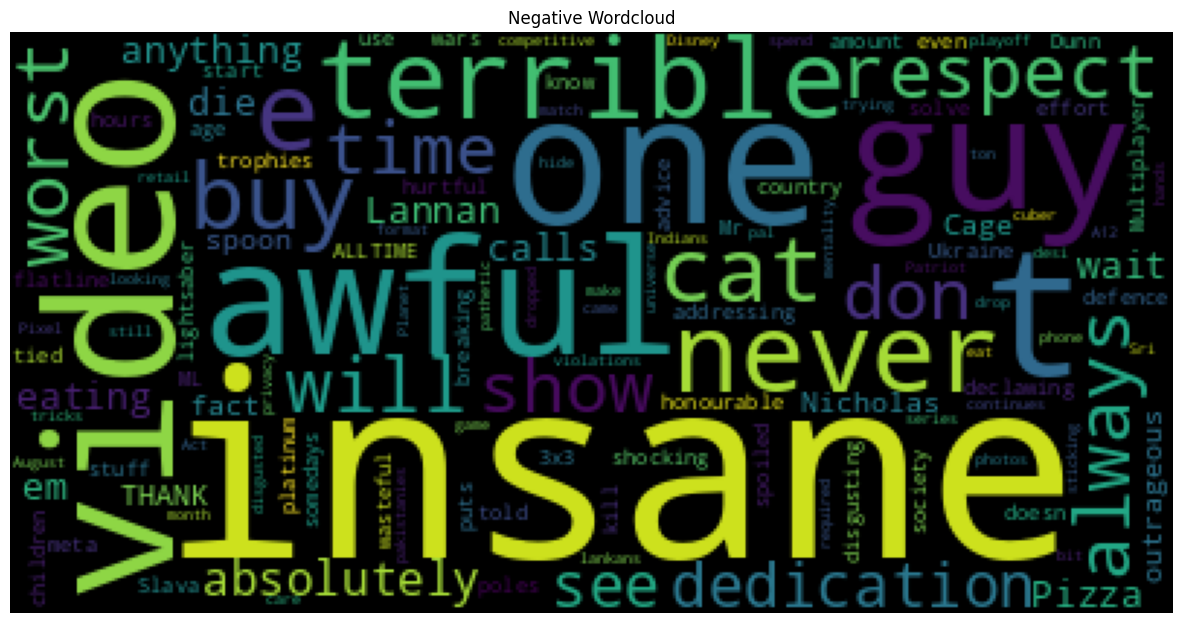

In [8]:
positive_polarity = df[df['polarity']==1]
negative_polarity = df[df['polarity']==-1]
from wordcloud import WordCloud, STOPWORDS
negative_polarity['Comment']
total_negative_comments=" ".join(negative_polarity['Comment'])
total_negative_comments[0:150]
negative_wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)
plt.figure(figsize=(15,10))
plt.title('Negative Wordcloud')
plt.axis('off')
plt.imshow(negative_wordcloud)

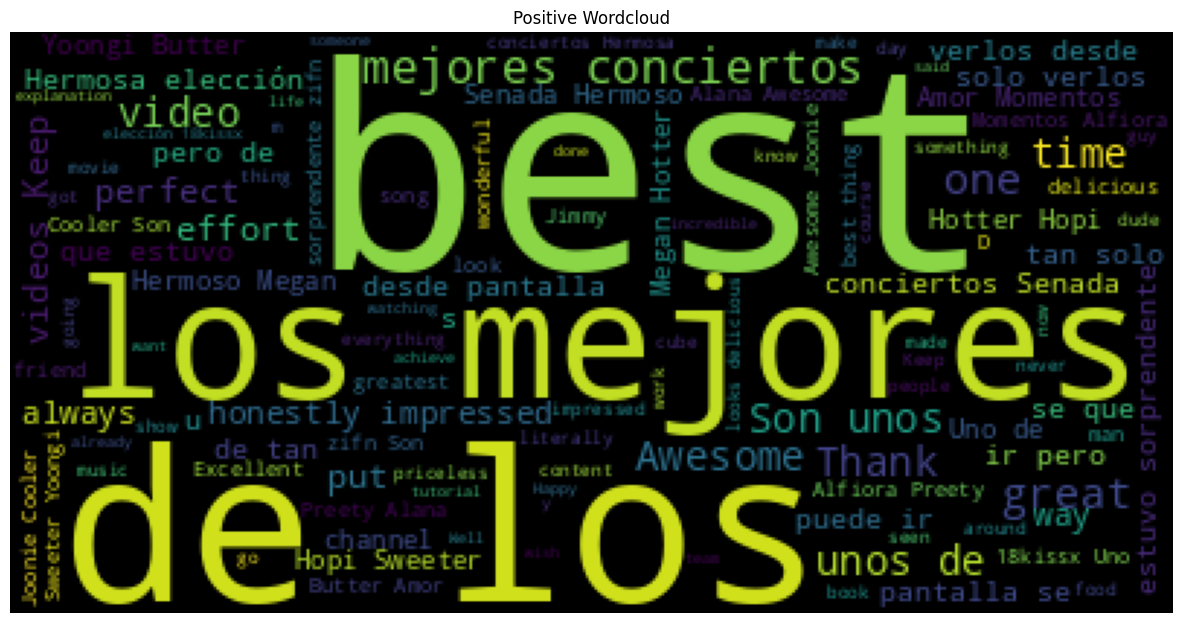

In [10]:
total_positive_comments=" ".join(positive_polarity['Comment'])
total_positive_comments[0:150]
positive_wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize=(15,10))
plt.title('Positive Wordcloud')
plt.axis('off')
plt.imshow(positive_wordcloud)

In [19]:
import emoji
df.head()
print('\U0001F600')
emoji_list = []
for i in df['Comment']:
  for j in i:
    if emoji.is_emoji(j):
      emoji_list.append(j)
emoji_list[0:10]
len(emoji_list)

😀


9289

In [20]:
from collections import Counter
Counter(emoji_list).most_common(10)
emojies = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]
frequency = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]
import plotly.graph_objs as go
from plotly.offline import iplot
trace = go.Bar(x=emojies,y=frequency)
iplot([trace])